In [1]:
%matplotlib inline
import numpy as np;
import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt
from __future__ import print_function
from scipy.stats import multivariate_normal, norm
from sympy import *

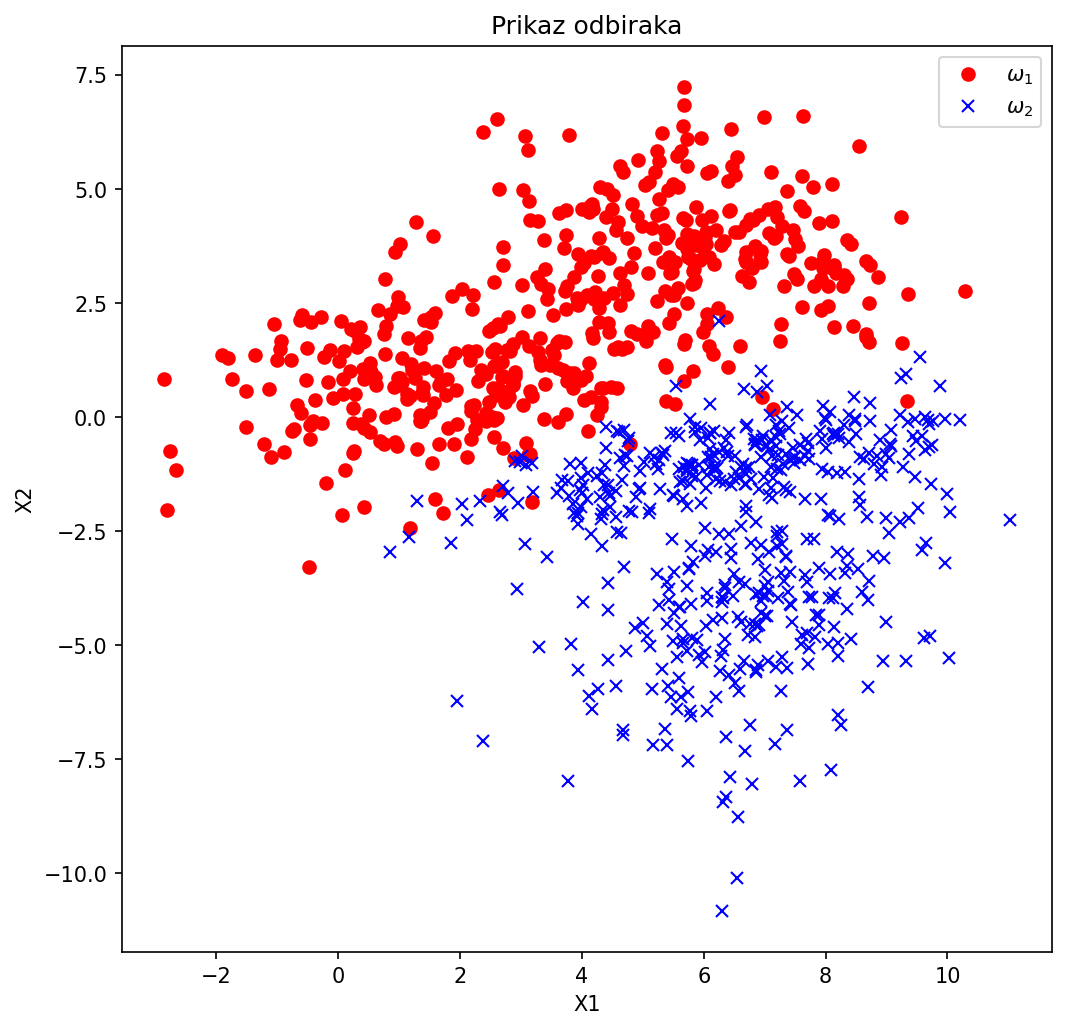

In [18]:
N = 500;
## raspodele su bimodalne

P11 = 0.6
P21 = 0.55

ind = np.random.rand(1,N)
ind = np.repeat(ind,2,axis = 0).T

M11 = np.array([2,1]).T 
M12 = np.array([6,4]).T 
M21 = np.array([7 ,-4]).T 
M22 = np.array([6, -1]).T

cov11 = np.array([[4, 1.1], [1.1, 2]])
cov12 = np.array([[3, -0.8], [-0.8, 1.5]])
cov21 = np.array([[2, 1.1], [1.1, 4]])
cov22 = np.array([[3, 0.8], [0.8, 0.5]])


#  
K11 = np.random.multivariate_normal(M11,cov11,N) * (ind < P11);
K12 = np.random.multivariate_normal(M12,cov12,N) * (ind > P11);

K1 = (K11 + K12).T;

K21 = np.random.multivariate_normal(M21,cov21,N) * (ind < P21)
K22 = np.random.multivariate_normal(M22,cov22,N) * (ind > P21)

K2 = (K21 + K22).T

fig, ax = plt.subplots(figsize = (8,8))
ax.set(xlabel = 'X1',ylabel = 'X2')
ax.plot(K1[0,:],K1[1,:],'ro',label = '$\omega_{1}$')
ax.plot(K2[0,:],K2[1,:],'bx',label = '$\omega_{2}$')
ax.set(title = 'Prikaz odbiraka')
ax.legend(loc = 'upper right')
plt.show()

## Druga iterativna procedura

In [3]:
## izracunavanje potrebnih parametara za parametrasku klasifikaciju
N1trening = np.array((0.8*N)).astype(int)

Trening1 = K1[:,0:N1trening]
Trening2 = K2[:,0:N1trening]
Test1 = K1[:,N1trening:N+1]
Test2 = K2[:,N1trening:N+1]



M1 = np.mean(Trening1,axis = 1)
M2 = np.mean(Trening2,axis = 1)

S1 = np.cov(Trening1)
S2 = np.cov(Trening2)

bestGreskaGlobal = 10000
bestGreskaIteracijaPlot = np.array([])
v0minimumi = np.array([])

for s in np.arange(0,1,0.01):
    V = np.dot(np.linalg.inv(s * S1 + (1 - s)*S2),(M2 - M1))
    y1 = np.dot(V.transpose(),Trening1)
    
    y2 = np.dot(V.transpose(),Trening2)
    
    
    v0min = -np.max(np.array([np.max(y1),np.max(y2)]))
    v0max = -np.min(np.array([np.min(y1),np.min(y2)]))
    
    
    
    bestGreskaIteracija = 10000
    for v0 in np.arange(v0min,v0max,0.01):
        Greska = np.sum(y1 > -v0) + np.sum(y2 < -v0)
        
        if Greska < bestGreskaIteracija:
            v0Best = v0
            bestGreskaIteracija = Greska
    bestGreskaIteracijaPlot = np.append(bestGreskaIteracijaPlot,bestGreskaIteracija)
    v0minimumi = np.append(v0minimumi,v0Best)
    
    #ax.plot(s,bestGreskaIteracija,'bo')
    if bestGreskaIteracija < bestGreskaGlobal:
        bestGreskaGlobal = bestGreskaIteracija
        Vbest = V
        v0BestGlobal = v0Best
        sopt = s
    
    
    
    
    
    
    

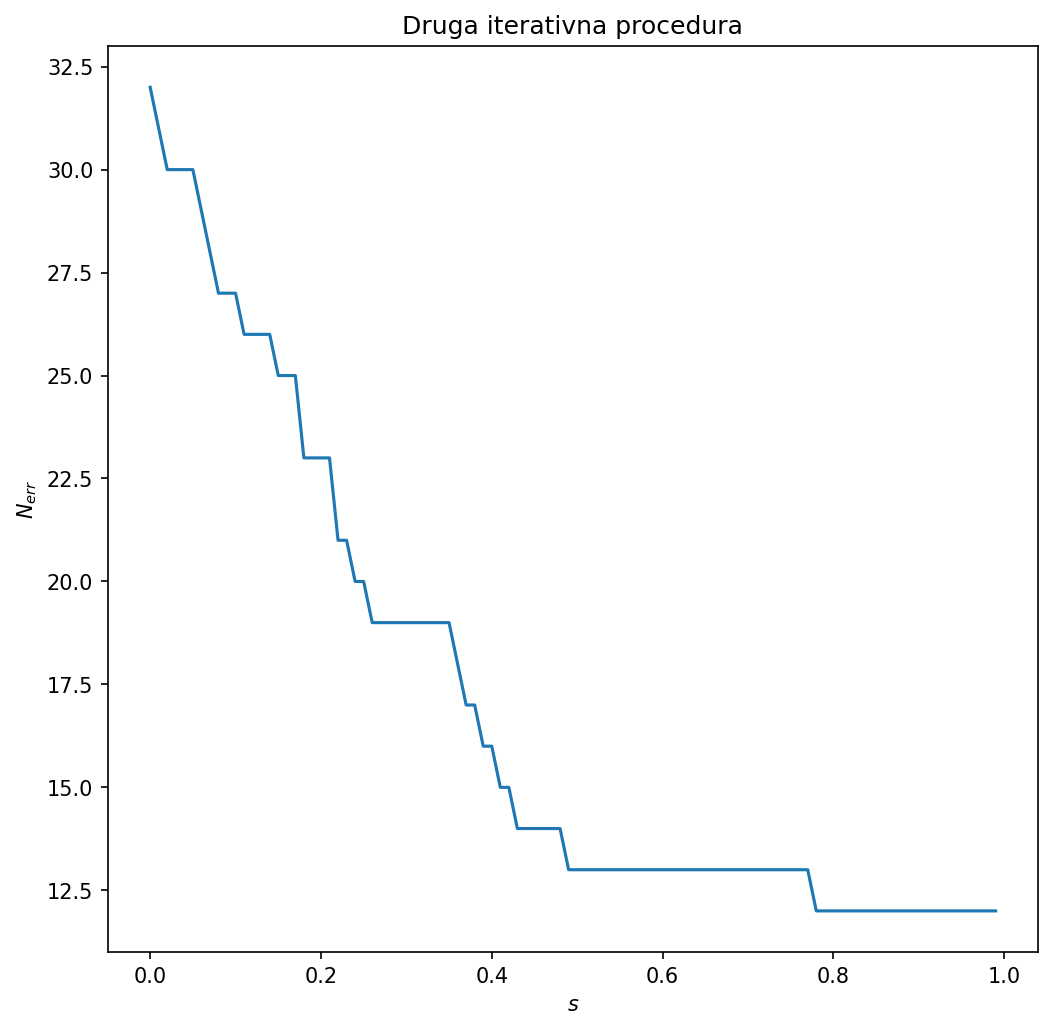

In [36]:
fig, ax = plt.subplots(figsize = (8,8))
ax.set(xlabel = '$s$',ylabel = '$N_{err}$',title = 'Druga iterativna procedura')
ax.plot(np.arange(0,1,0.01),bestGreskaIteracijaPlot)
plt.show()

In [40]:
Vbest


array([ 1.22555572, -1.92925845])

In [41]:
v0BestGlobal

-6.257661164058913

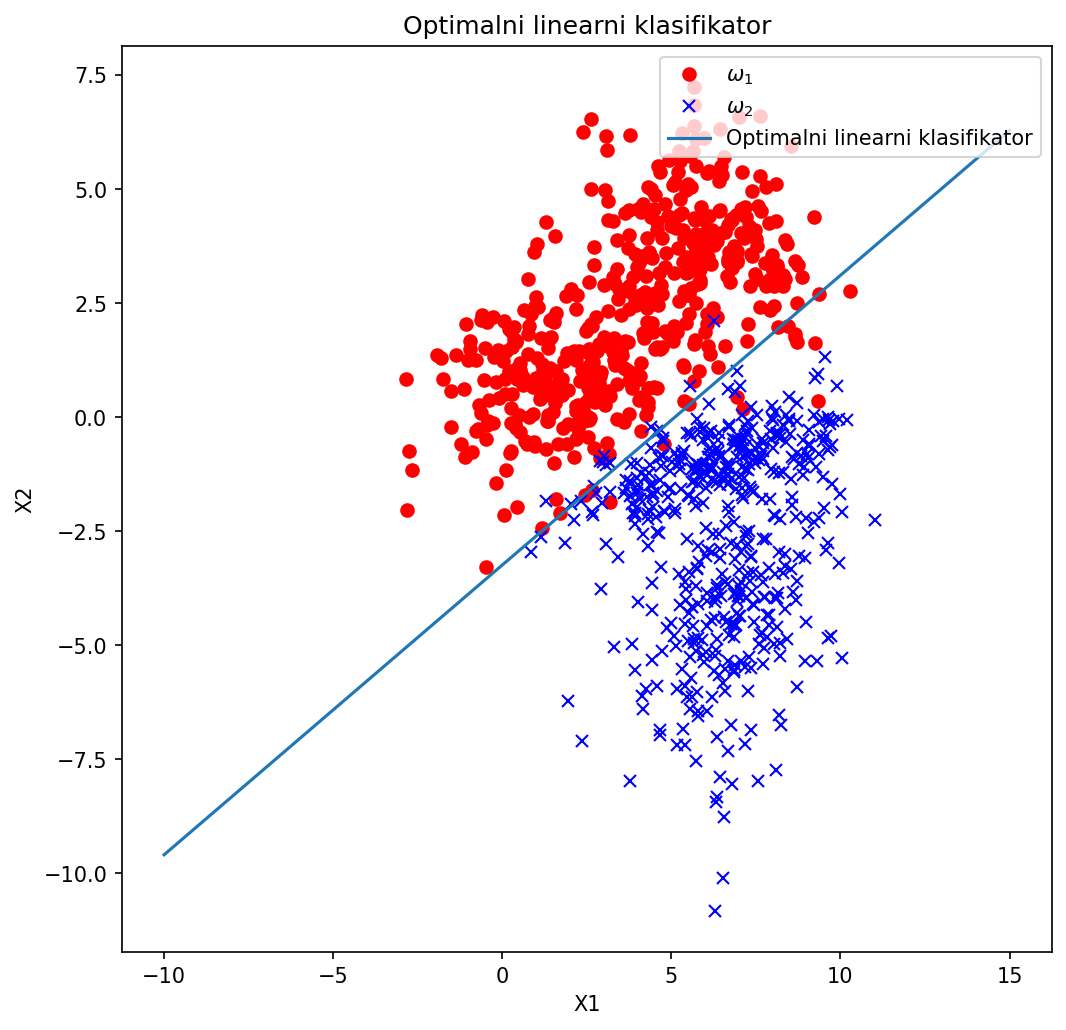

In [39]:

x_osa = np.array([-10,15])
optLinklas = -(Vbest[0]*x_osa + v0BestGlobal)/Vbest[1]
fig, ax = plt.subplots(figsize = (8,8))
ax.set(xlabel = 'X1',ylabel = 'X2')
ax.plot(K1[0,:],K1[1,:],'ro',label = '$\omega_{1}$')
ax.plot(K2[0,:],K2[1,:],'bx',label = '$\omega_{2}$')
ax.plot(x_osa,optLinklas,label = 'Optimalni linearni klasifikator')
ax.set(title = 'Optimalni linearni klasifikator')
ax.legend(loc = 'upper right')
plt.show()

In [20]:
## Metod zeljenog izlaza
## formiranje odbiraka
Z = np.zeros((2,1000))

for i in np.arange(0,N):
    dodaj = -np.array([K1[0,i],K1[1,i]])
    
    Z[:,i] = dodaj
    
for i in np.arange(0,N):
    dodaj = np.array([K2[0,i],K2[1,i]])
    
    Z[:,N+i] = dodaj
    


In [30]:
jedinice = np.reshape([-np.ones((1,500)), np.ones((1,500))],(1,1000))
Zfull = np.concatenate((jedinice,Z),axis = 0)
W = np.dot(np.linalg.inv(np.dot(Zfull,Zfull.transpose())),Zfull)

Gama1 = 1 * np.ones((500,1))
Gama2 = 1* np.ones((500,1))
Gama = np.concatenate((Gama1,Gama2))
W1 = np.dot(W,Gama)

Gama1 = 1 * np.ones((500,1))
Gama2 = 2* np.ones((500,1))
Gama = np.concatenate((Gama1,Gama2))
W2 = np.dot(W,Gama)

Gama1 = 2 * np.ones((500,1))
Gama2 = 1* np.ones((500,1))
Gama = np.concatenate((Gama1,Gama2))
W3 = np.dot(W,Gama)







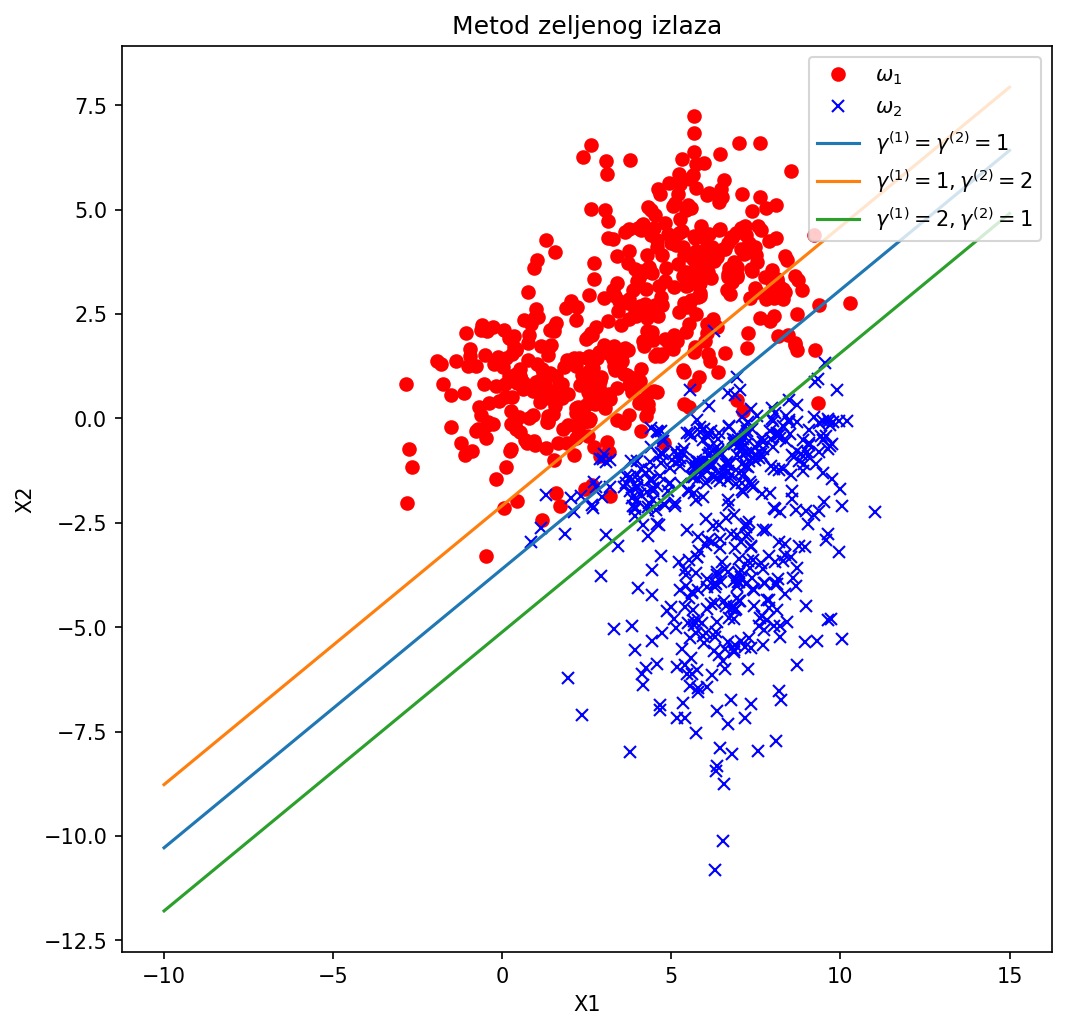

In [35]:
x_osa = np.array([-10,15])
optLinklas1 = -(W1[1]*x_osa + W1[0])/W1[2]
optLinklas2 = -(W2[1]*x_osa + W2[0])/W2[2]
optLinklas3 = -(W3[1]*x_osa + W3[0])/W3[2]
fig, ax = plt.subplots(figsize = (8,8))
ax.set(xlabel = 'X1',ylabel = 'X2')
ax.plot(K1[0,:],K1[1,:],'ro',label = '$\omega_{1}$')
ax.plot(K2[0,:],K2[1,:],'bx',label = '$\omega_{2}$')
ax.plot(x_osa,optLinklas1,label = '$\gamma^{(1)} = \gamma^{(2)} = 1$')
ax.plot(x_osa,optLinklas2,label = '$\gamma^{(1)} = 1, \gamma^{(2)} = 2$')
ax.plot(x_osa,optLinklas3,label = '$\gamma^{(1)} = 2 ,\gamma^{(2)} = 1$')
ax.set(title = 'Metod zeljenog izlaza')
ax.legend(loc = 'upper right')
plt.show()

## Kvadratni klasifikator



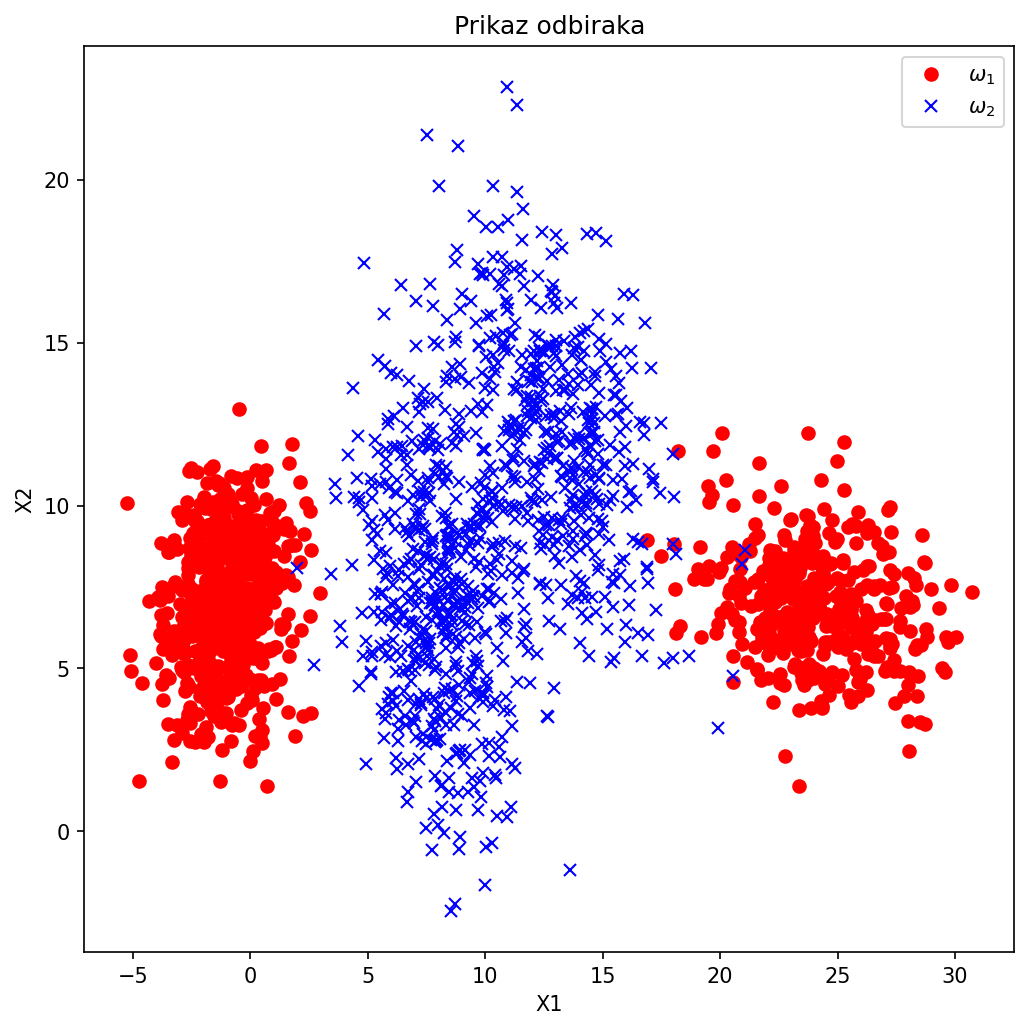

In [43]:
N = 1000;
## raspodele su bimodalne

P11 = 0.6
P21 = 0.55

ind = np.random.rand(1,N)
ind = np.repeat(ind,2,axis = 0).T

M11 = np.array([-1,7]).T 
M12 = np.array([24,7]).T 
M21 = np.array([8 ,7]).T 
M22 = np.array([13, 12]).T

cov11 = np.array([[2, 0.5], [0.5, 4.5]])
cov12 = np.array([[5.5, -0.7], [-0.7, 2.8]])
cov21 = np.array([[4, -1.1], [-1.1, 11]])
cov22 = np.array([[5, -2.7], [-2.7, 9.8]])


#  
K11 = np.random.multivariate_normal(M11,cov11,N) * (ind < P11);
K12 = np.random.multivariate_normal(M12,cov12,N) * (ind > P11);

K1 = (K11 + K12).T;

K21 = np.random.multivariate_normal(M21,cov21,N) * (ind < P21)
K22 = np.random.multivariate_normal(M22,cov22,N) * (ind > P21)

K2 = (K21 + K22).T
fig, ax = plt.subplots(figsize = (8,8))
ax.set(xlabel = 'X1',ylabel = 'X2')
ax.plot(K1[0,:],K1[1,:],'ro',label = '$\omega_{1}$')
ax.plot(K2[0,:],K2[1,:],'bx',label = '$\omega_{2}$')
ax.set(title = 'Prikaz odbiraka')
ax.legend(loc = 'upper right')
plt.show()

In [46]:
indeksiZnacaj = K1[0,:] > -2
indeksiZnacaj1 = K1[0,:] < 22
indeksiZnacaj = np.logical_and(indeksiZnacaj,indeksiZnacaj1)
                
indeksiZnacaj2 = K2[1,:] < 5

In [44]:
## formiranje odbiraka
Z = np.zeros((5,2000))

for i in np.arange(0,N):
    dodaj = -np.array([K1[0,i]**2 , K1[1,i]**2,K1[0,i]*K1[1,i],K1[0,i],K1[1,i]])
    
    Z[:,i] = dodaj
    
for i in np.arange(0,N):
    dodaj = np.array([K2[0,i]**2 , K2[1,i]**2,K2[0,i]*K2[1,i],K2[0,i],K2[1,i]])
    
    Z[:,N+i] = dodaj
  




In [47]:
jedinice = np.reshape([-np.ones((1,1000)), np.ones((1,1000))],(1,2000))
Zfull = np.concatenate((jedinice,Z),axis = 0)


Gama1 = 1 * np.ones((1000,1))
Gama1[indeksiZnacaj] = 1
Gama2 = 0.6 * np.ones((1000,1))
Gama2[indeksiZnacaj2] = 0.6
Gama = np.concatenate((Gama1,Gama2))



W = np.dot(np.linalg.inv(np.dot(Zfull,Zfull.transpose())),Zfull)
W = np.dot(W,Gama)




In [48]:
Q = np.empty((2,2))
V = np.empty((2,1))
Q[0,0] = W[1]
Q[1,1] = W[2]
Q[0,1] = W[3]/2
Q[1,0] = W[3]/2
V = W[4:6]
v0 = W[0]
Q,V,v0

(array([[-0.00850739, -0.00029333],
        [-0.00029333,  0.00260687]]),
 array([[ 0.20377495],
        [-0.03614633]]),
 array([-0.53030881]))

In [49]:
X = MatrixSymbol('X',2,1)
X1,X2 = symbols("X1 X2")
Qsym = Matrix(Q)
Vsym = Matrix(V)
Xsym = Matrix([[X1],[X2]])
#(_,Qsym) = np.linalg.qr(Q)
#(_,Vsym) = np.linalg.qr(V)
v0sym = Matrix(v0)

v0sym



Matrix([[-0.530308806911527]])

In [50]:
solution = Matrix(solve(Xsym.T*Qsym*Xsym + Vsym.T*Xsym + v0sym,Xsym[1,0]))


<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.112521312270986*X1 - 15.8585249916425*sqrt(0.0130266681977272*X1**2 - 0.304614335634476*X1 + 1) + 6.93290664784885)
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in sqrt
  return (0.112521312270986*X1 + 15.8585249916425*sqrt(0.0130266681977272*X1**2 - 0.304614335634476*X1 + 1) + 6.93290664784885)


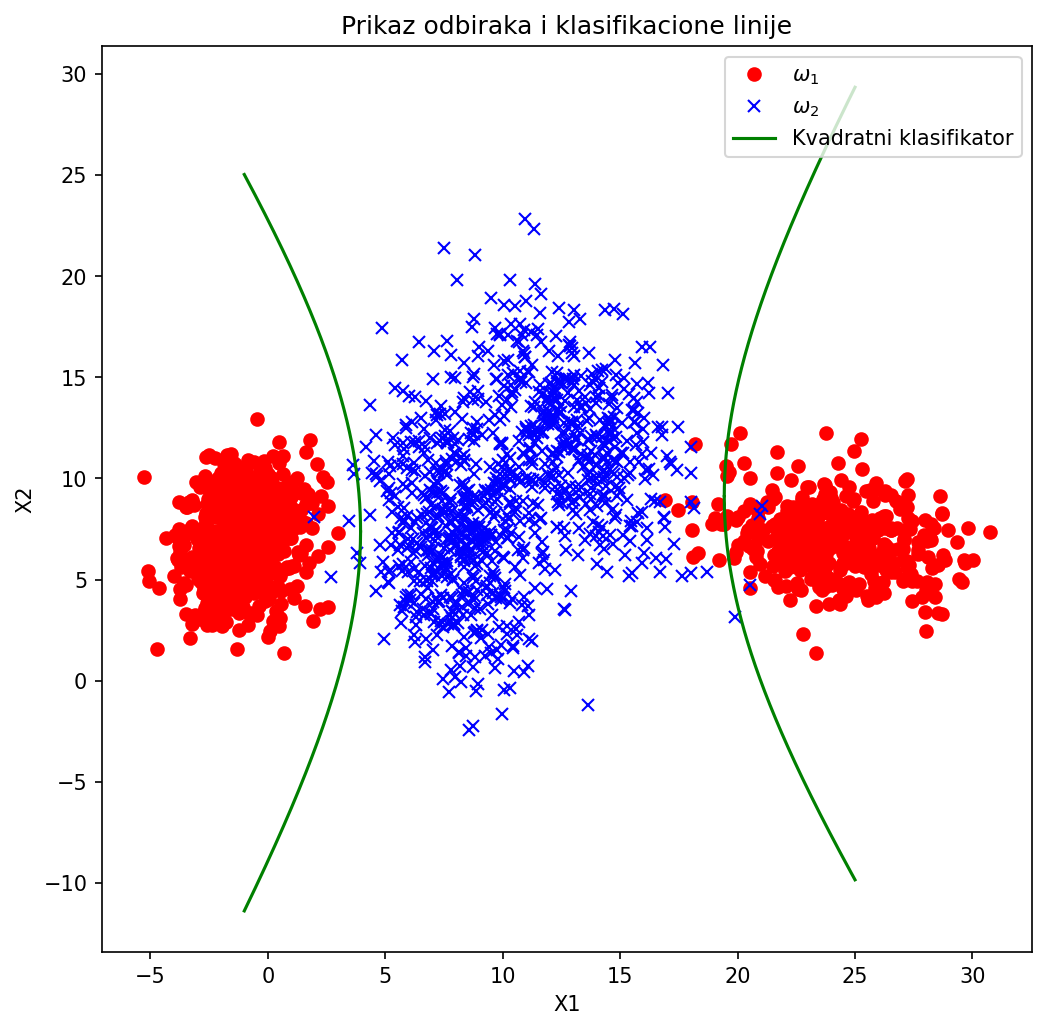

In [51]:
xosa = np.arange(-1,25,0.0001)
#xosa1 = 0.524489871799374*np.sqrt(-0.0446591892197889*np.square(yosa) + yosa + 0.485792923765261) - 0.0013878014400443*yosa + 0.000116896397218449
#xosa1 = -0.524489871799374*np.sqrt(-0.0446591892197889*np.square(yosa) + yosa + 0.485792923765261) - 0.0013878014400443*yosa + 0.000116896397218449
yosa1 = lambdify(X1,solution[0,0],'numpy')
yosa1= yosa1(xosa)
yosa2 = lambdify(X1,solution[1,0],'numpy')
yosa2= yosa2(xosa)
fig, ax = plt.subplots(figsize = (8,8))
ax.set(xlabel = 'X1',ylabel = 'X2')
ax.plot(K1[0,:],K1[1,:],'ro',label = '$\omega_{1}$')
ax.plot(K2[0,:],K2[1,:],'bx',label = '$\omega_{2}$')
ax.set(title = 'Prikaz odbiraka i klasifikacione linije')


ax.plot(xosa,yosa1,'g',label = 'Kvadratni klasifikator')
ax.plot(xosa,yosa2,'g')
ax.legend(loc = 'upper right')
plt.show()
